In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.copy_on_write=True

# 2022

- Primero cargamos el dataset de acccidentalidad de Madrid del año 2022:

In [2]:
df_2022 = pd.read_csv(
    "./data/2022_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)

Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [3]:
df_2022.shape

(47053, 19)

- Aquí observamos que tiene 19 columnas igual que 2025, 2024 y 2023, y tiene 47053 filas

Ahora para el formato real de los datos y detectar valores a simple vista

In [4]:
df_2022

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,NaN,NaN,443359.0,4472082.0,N,NaN
1,2022S000001,01/01/2022,1:30:00,"AVDA. ALBUFERA, 19",19,13,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,443359.0,4472082.0,N,NaN
2,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Conductor,De 30 a 34 años,Hombre,NaN,NaN,441155.0,4474129.0,S,NaN
3,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Motocicleta hasta 125cc,Pasajero,De 35 a 39 años,Mujer,NaN,NaN,441155.0,4474129.0,N,NaN
4,2022S000002,01/01/2022,0:30:00,PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO,2,3,RETIRO,Colisión fronto-lateral,NaN,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,441155.0,4474129.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47048,2022S041289,29/12/2022,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Conductor,De 50 a 54 años,Hombre,14.0,Sin asistencia sanitaria,437453.0,4470784.0,N,NaN
47049,2022S041289,29/12/2022,19:40:00,CALL. GENERAL RICARDOS / plaza de toros,174,11,CARABANCHEL,Alcance,Despejado,Turismo,Pasajero,De 50 a 54 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,437453.0,4470784.0,N,NaN
47050,2022S041312,12/12/2022,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 21 a 24 años,Mujer,NaN,NaN,441049.0,4469136.0,N,NaN
47051,2022S041312,12/12/2022,22:50:00,AVDA. ANDALUCIA / AVDA. PERLA,14,12,USERA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 35 a 39 años,Hombre,NaN,NaN,441049.0,4469136.0,N,NaN


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47053 entries, 0 to 47052
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        47053 non-null  object 
 1   fecha                 47053 non-null  object 
 2   hora                  47053 non-null  object 
 3   localizacion          47053 non-null  object 
 4   numero                47053 non-null  object 
 5   cod_distrito          47053 non-null  int64  
 6   distrito              47053 non-null  object 
 7   tipo_accidente        47053 non-null  object 
 8   estado_meteorológico  41763 non-null  object 
 9   tipo_vehiculo         46854 non-null  object 
 10  tipo_persona          47053 non-null  object 
 11  rango_edad            47053 non-null  object 
 12  sexo                  47053 non-null  object 
 13  cod_lesividad         24905 non-null  float64
 14  lesividad             24905 non-null  object 
 15  coordenada_x_utm   

Aquí procedemos a hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demás.

In [6]:
df_2022_copy = df_2022.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.

In [7]:
# Número de nulos 
nulos = df_2022.isna().sum() 

# Porcentaje de nulos 
nulos_pct = (nulos / len(df_2022) * 100).round(2) 

# Cardinalidad 
card = df_2022.nunique() 

# Porcentaje de cardinalidad 
card_pct = (card / len(df_2022) * 100).round(2) 

# Tipo de dato 
tipos = df_2022.dtypes 

#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 

# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

,nulos,% nulos,cardinalidad,% cardinalidad,tipo
num_expediente,0,0.00,20212,42.96,object
localizacion,0,0.00,15146,32.19,object
coordenada_y_utm,10,0.02,10802,22.96,float64
coordenada_x_utm,10,0.02,10111,21.49,float64
hora,0,0.00,1207,2.57,object
numero,0,0.00,913,1.94,object
fecha,0,0.00,365,0.78,object
tipo_vehiculo,199,0.42,32,0.07,object
cod_distrito,0,0.00,21,0.04,int64
distrito,0,0.00,21,0.04,object


In [8]:
df_2022["fecha"] = pd.to_datetime(df_2022["fecha"], errors="coerce", dayfirst=True) 
df_2022["hora"] = pd.to_datetime(df_2022["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_2022["fecha_hora"] = df_2022.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_2022[col] = df_2022[col].astype("string").str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

- Ahora vamos a tratar los nulos 

In [9]:
# 1. ESTADO METEOROLÓGICO
df_2022['estado_meteorológico'] = df_2022['estado_meteorológico'].fillna('No consta')

# 2. TIPO VEHÍCULO 
mask_no_aplica = df_2022['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 

# Peatón y testigo → No aplica 
df_2022.loc[ mask_no_aplica & df_2022['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica'

# El resto de nulos → No consta 
df_2022['tipo_vehiculo'] = df_2022['tipo_vehiculo'].fillna('No consta') 

# 3. LESIVIDAD (ORDINAL) 
df_2022['cod_lesividad'] = df_2022['cod_lesividad'].fillna(14) 
df_2022['lesividad'] = df_2022['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL Y DROGAS 
df_2022['positiva_alcohol'] = df_2022['positiva_alcohol'].fillna('No consta') 
df_2022['positiva_droga'] = df_2022['positiva_droga'].fillna('No consta')

#5. NUMERO 
df_2022['numero'] = df_2022['numero'].fillna('No aplica') 

In [10]:
# 6. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 'positiva_droga' 
                 ] 
for col in cols_category: 
    df_2022[col] = df_2022[col].astype('category')

In [11]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47053 entries, 0 to 47052
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        47053 non-null  string        
 1   fecha                 47053 non-null  datetime64[ns]
 2   hora                  47053 non-null  object        
 3   localizacion          47053 non-null  string        
 4   numero                47053 non-null  string        
 5   cod_distrito          47053 non-null  category      
 6   distrito              47053 non-null  category      
 7   tipo_accidente        47053 non-null  category      
 8   estado_meteorológico  47053 non-null  category      
 9   tipo_vehiculo         47053 non-null  category      
 10  tipo_persona          47053 non-null  category      
 11  rango_edad            47053 non-null  category      
 12  sexo                  47053 non-null  category      
 13  cod_lesividad   

## Análisis univariante

### 1. Tendencias centrales

Miro la moda de las variables categóricas (ordenadas según el número de importancia) para ver qué valores tienen mayor frecuencia absoluta

In [12]:
cols_categoricas = ["tipo_persona",
                    "distrito",
                    "localizacion",
                    "tipo_accidente",
                    "estado_meteorológico",
                    "rango_edad",
                    "lesividad",
                    "positiva_alcohol",
                    "tipo_vehiculo",
                    "sexo"
                    ]

In [13]:
df_2022[cols_categoricas].mode().T

,0
tipo_persona,Conductor
distrito,PUENTE DE VALLECAS
localizacion,"autov. a-2, +00500e"
tipo_accidente,Colisión fronto-lateral
estado_meteorológico,Despejado
rango_edad,Desconocido
lesividad,Sin asistencia sanitaria
positiva_alcohol,N
tipo_vehiculo,Turismo
sexo,Hombre


Salen los mismos valores que en 2023.

Miro qué localización tiene mayor frecuencia en el Puente de Vallecas:

In [14]:
df_2022[df_2022["distrito"] == "puente de vallecas".upper()]["localizacion"].value_counts(ascending=False)

localizacion
autov. m-30, +01000e                             54
avda. albufera / autov. m-40                     47
avda. albufera / avda. pablo neruda              40
avda. entrevias, 2                               35
autov. m-30, +01200e                             29
                                                 ..
call. santiago alio, 11                           1
avda. albufera, 121                               1
autov. m-30 / avda. andalucia                     1
autov. m-30, 09cc30 m-30 c-1 central pk 9.300     1
gta. jose luis ozores / buenos aires              1
Name: count, Length: 1096, dtype: Int64

In [15]:
df_2022[df_2022["distrito"] == "puente de vallecas".upper()]["localizacion"].mode()

0    autov. m-30, +01000e
Name: localizacion, dtype: string

Tanto en 2023 como en 2022, los de mayor frecuencia son cruces con Avda. Albufera. Además en 2022 también hay una alta frecuencia de accidentes en la M-30.

### 2. Frecuencias

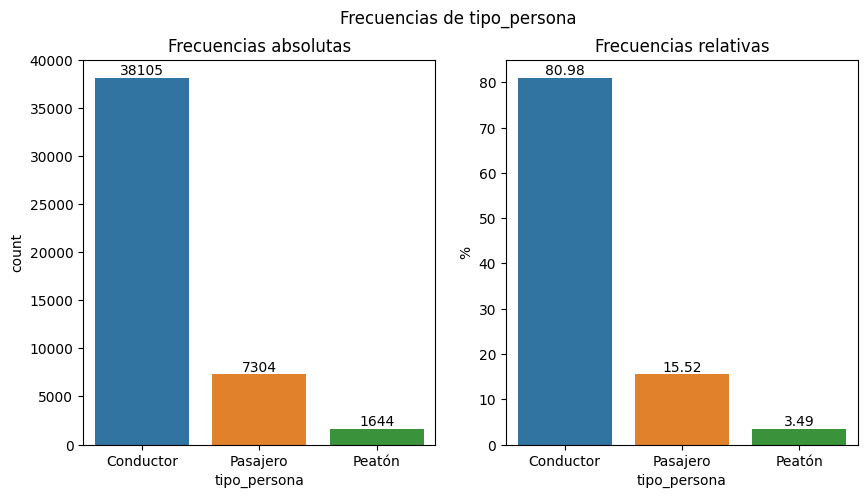

In [16]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Frecuencias de tipo_persona")

# Frecuencias absolutas
sns.countplot(x = "tipo_persona", data = df_2022, ax = axs[0], hue = "tipo_persona")
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2022.tipo_persona.value_counts(normalize = True) * 100).round(2)
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3481170561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_distritos, x = "distrito", palette = colores, order = top5_distritos, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3481170561.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


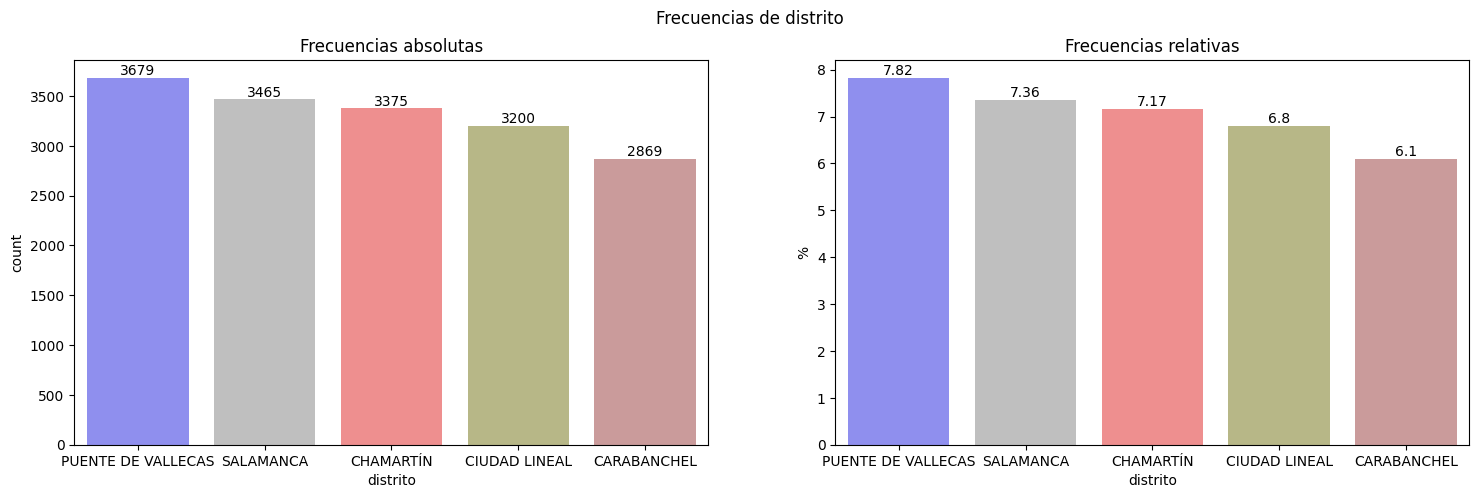

In [17]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de distrito")

top5_distritos = df_2022["distrito"].value_counts().nlargest().index
df_top5_distritos = df_2022[df_2022["distrito"].isin(top5_distritos)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_distritos, x = "distrito", palette = colores, order = top5_distritos, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["distrito"].value_counts(normalize=True)*100).round(2).loc[top5_distritos])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\760386781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_tipo_accidentes, x = "tipo_accidente", palette = colores, order = top5_tipo_accidentes, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\760386781.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


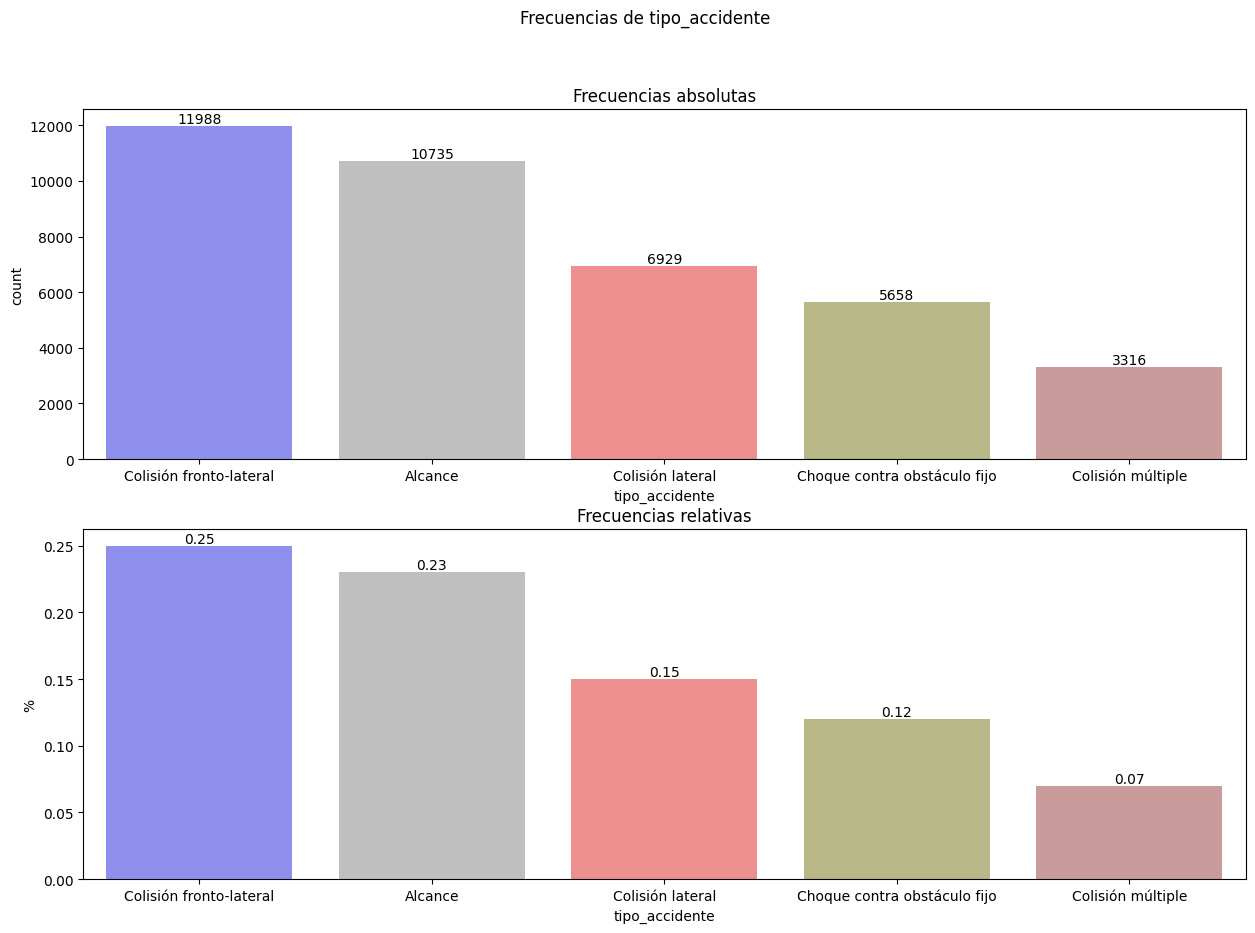

In [18]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
fig.suptitle("Frecuencias de tipo_accidente")

top5_tipo_accidentes = df_2022["tipo_accidente"].value_counts().nlargest().index
df_top5_tipo_accidentes = df_2022[df_2022["tipo_accidente"].isin(top5_tipo_accidentes)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_tipo_accidentes, x = "tipo_accidente", palette = colores, order = top5_tipo_accidentes, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2022["tipo_accidente"].value_counts(normalize=True).round(2).loc[top5_tipo_accidentes])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3514597259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_estados, x = "estado_meteorológico", palette = colores, order = estados, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3514597259.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


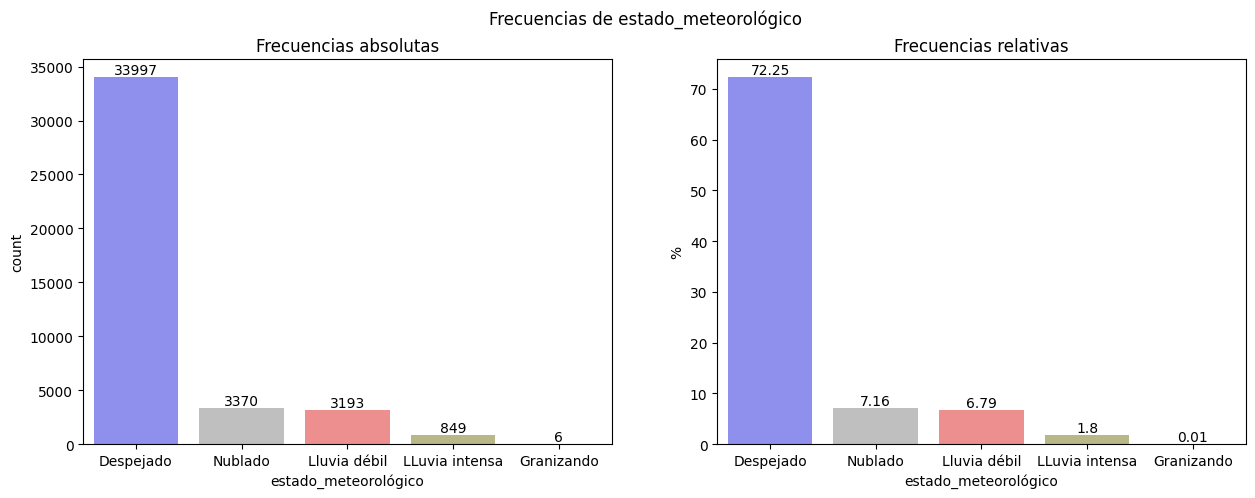

In [19]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de estado_meteorológico")

estados = ["Despejado", "Nublado", "Lluvia débil", "LLuvia intensa", "Granizando"]
df_estados = df_2022[df_2022["estado_meteorológico"].isin(estados)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_estados, x = "estado_meteorológico", palette = colores, order = estados, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["estado_meteorológico"].value_counts(normalize=True)*100).round(2).loc[estados])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1628078361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_edades, x = "rango_edad", palette = colores, order = top5_edades, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1628078361.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


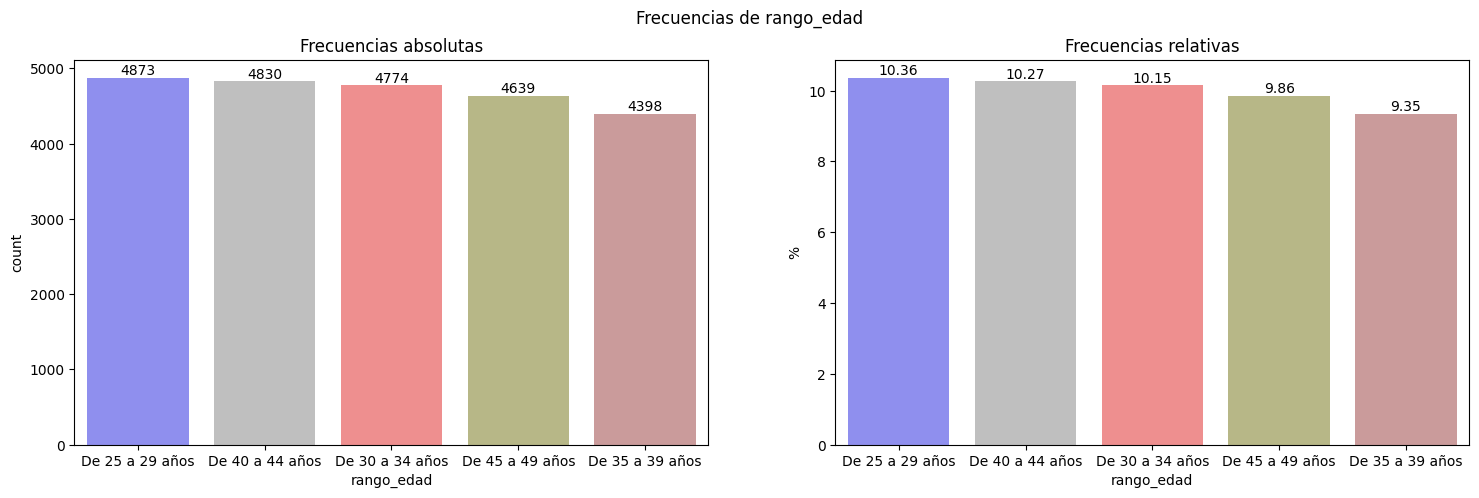

In [20]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de rango_edad")

top5_edades = df_2022[df_2022["rango_edad"] != "Desconocido"]["rango_edad"].value_counts().nlargest().index
df_top5_edades = df_2022[df_2022["rango_edad"].isin(top5_edades)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_edades, x = "rango_edad", palette = colores, order = top5_edades, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["rango_edad"].value_counts(normalize=True)*100).round(2).loc[top5_edades])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [21]:
df_2022["lesividad"] = df_2022["cod_lesividad"].replace({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})


C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1499061938.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2022["lesividad"] = df_2022["cod_lesividad"].replace({


C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1467126284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_lesividades, x = "lesividad", palette = colores, order = lesividades, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1467126284.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


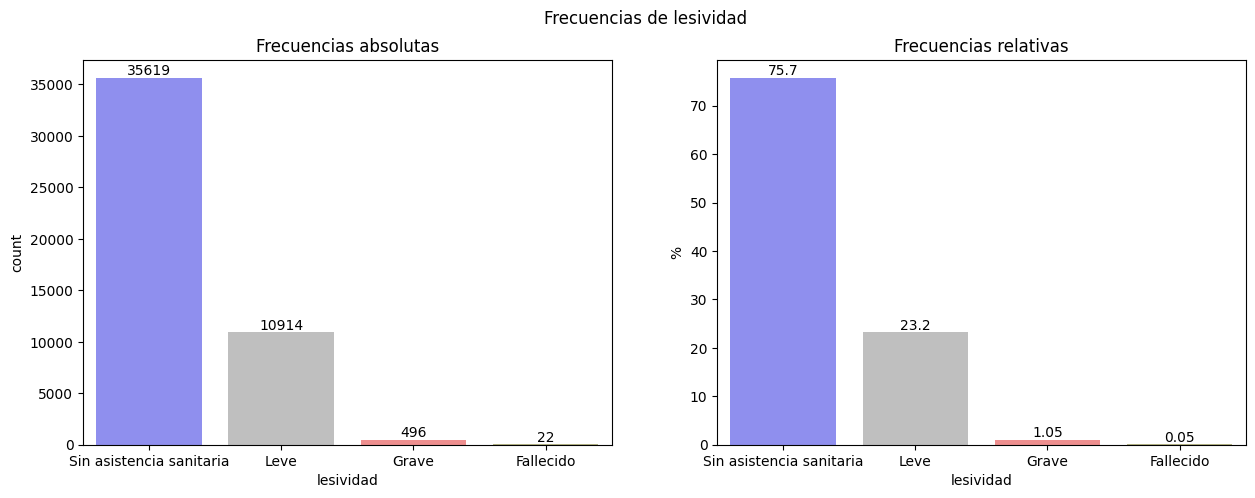

In [22]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de lesividad")

lesividades = df_2022[df_2022["lesividad"] != "Se desconoce"]["lesividad"].unique()
df_lesividades = df_2022[df_2022["lesividad"].isin(lesividades)]
colores = ["blue","gray","red","olive"]

# Frecuencias absolutas
sns.countplot(data = df_lesividades, x = "lesividad", palette = colores, order = lesividades, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["lesividad"].value_counts(normalize=True)*100).round(2).loc[lesividades])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\4284506048.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_alcohol, x = "positiva_alcohol", palette = colores, order = alcohol, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\4284506048.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


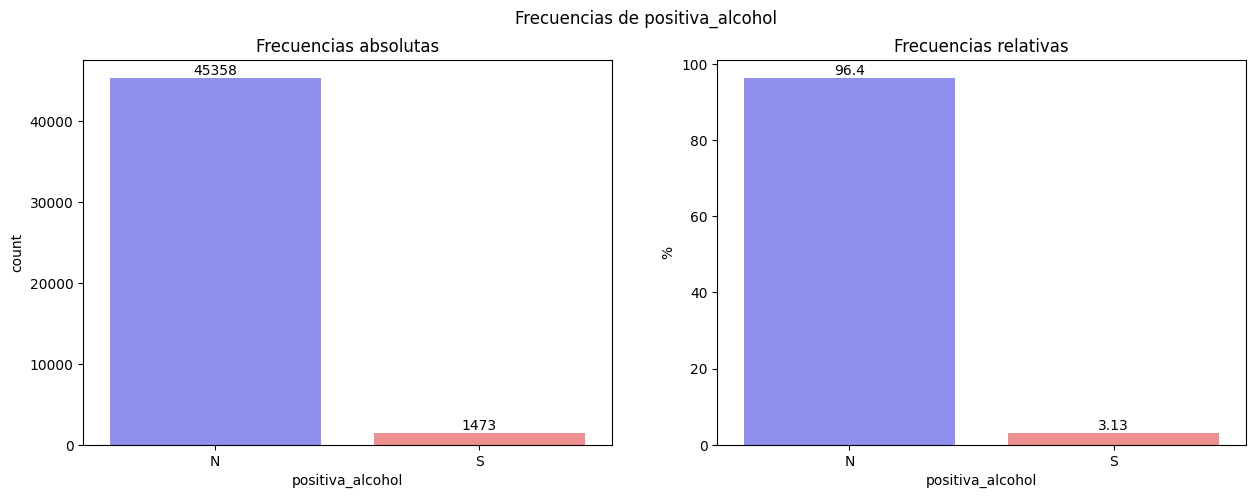

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de positiva_alcohol")

alcohol = df_2022[df_2022["positiva_alcohol"] != "No consta"]["positiva_alcohol"].unique()
df_alcohol = df_2022[df_2022["positiva_alcohol"].isin(alcohol)]
colores = ["blue", "red"]

# Frecuencias absolutas
sns.countplot(data = df_alcohol, x = "positiva_alcohol", palette = colores, order = alcohol, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["positiva_alcohol"].value_counts(normalize=True)*100).round(2).loc[alcohol])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3064169236.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_top5_vehiculos, x = "tipo_vehiculo", palette = colores, order = top5_vehiculos, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\3064169236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


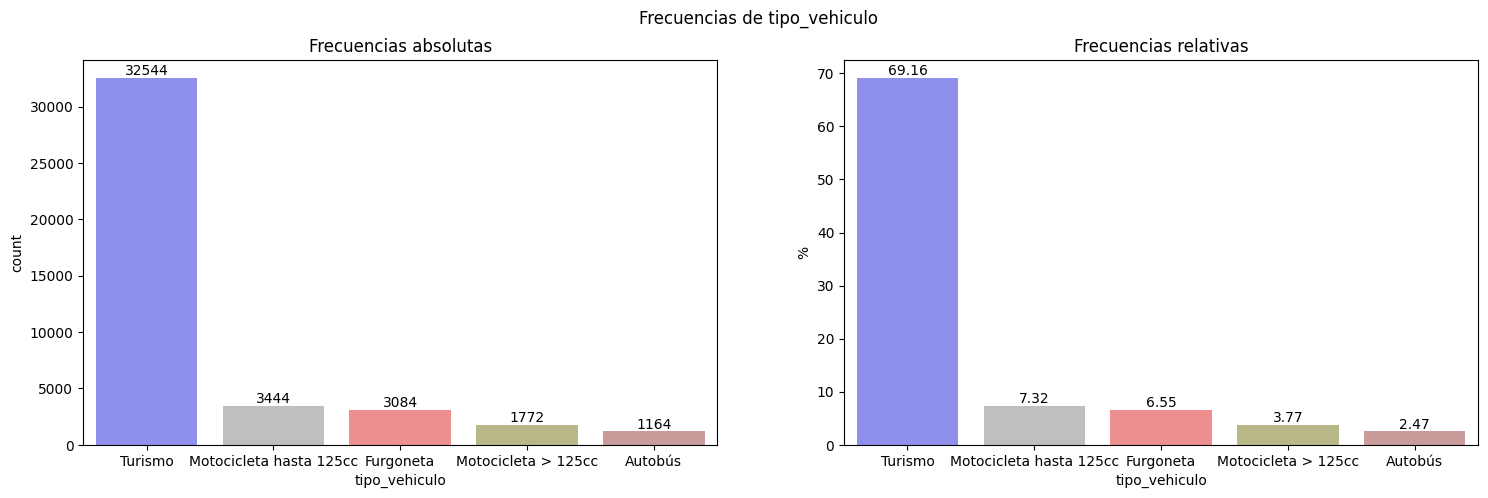

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 5))
fig.suptitle("Frecuencias de tipo_vehiculo")

top5_vehiculos = df_2022["tipo_vehiculo"].value_counts().nlargest().index
df_top5_vehiculos = df_2022[df_2022["tipo_vehiculo"].isin(top5_vehiculos)]
colores = ["blue","gray","red","olive","brown"]

# Frecuencias absolutas
sns.countplot(data = df_top5_vehiculos, x = "tipo_vehiculo", palette = colores, order = top5_vehiculos, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["tipo_vehiculo"].value_counts(normalize=True)*100).round(2).loc[top5_vehiculos])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1428368430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_sexos, x = "sexo", palette = colores, order = sexos, alpha = 0.5, ax = axs[0])
C:\Users\lufue\AppData\Local\Temp\ipykernel_13380\1428368430.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])


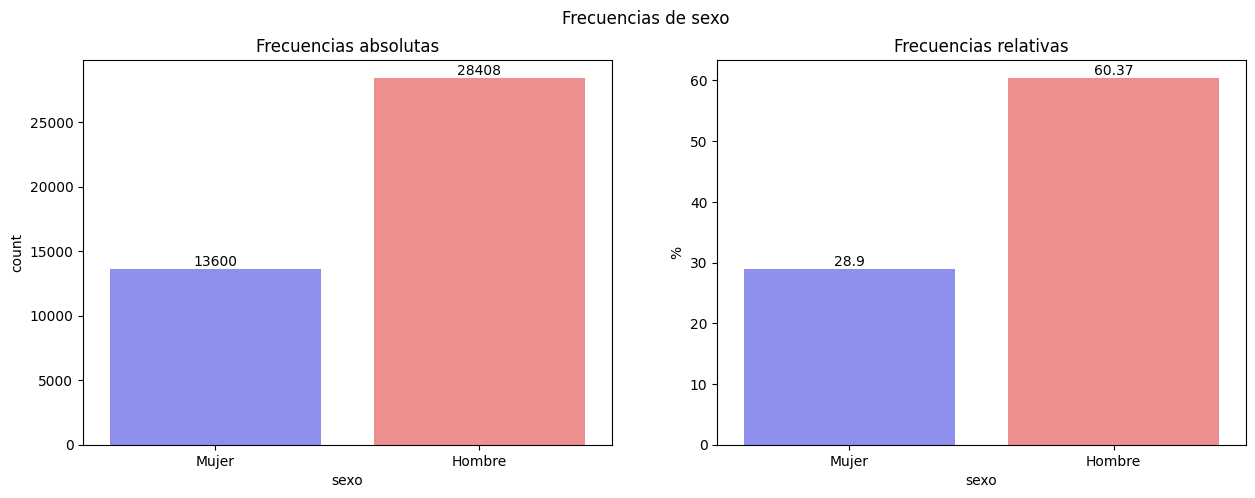

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
fig.suptitle("Frecuencias de sexo")

sexos = df_2022[df_2022["sexo"] != "Desconocido"]["sexo"].unique()
df_sexos = df_2022[df_2022["sexo"].isin(sexos)]
colores = ["blue", "red"]

# Frecuencias absolutas
sns.countplot(data = df_sexos, x = "sexo", palette = colores, order = sexos, alpha = 0.5, ax = axs[0])
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = ((df_2022["sexo"].value_counts(normalize=True)*100).round(2).loc[sexos])
sns.barplot(x = valores.index, y = valores.values, palette = colores, order = valores.index, alpha= 0.5, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [26]:
df_2022["hora_categoria"] = ""

df_2022.loc[
    (df_2022["fecha_hora"].dt.hour >= 0) & (df_2022["fecha_hora"].dt.hour < 6),
    "hora_categoria"
] = "Madrugada"

df_2022.loc[
    (df_2022["fecha_hora"].dt.hour >= 6) & (df_2022["fecha_hora"].dt.hour < 12),
    "hora_categoria"
] = "Mañana"

df_2022.loc[
    df_2022["fecha_hora"].dt.hour == 12,
    "hora_categoria"
] = "Mediodía"

df_2022.loc[
    (df_2022["fecha_hora"].dt.hour >= 13) & (df_2022["fecha_hora"].dt.hour < 19),
    "hora_categoria"
] = "Tarde"

df_2022.loc[
    df_2022["fecha_hora"].dt.hour >= 19,
    "hora_categoria"
] = "Noche"

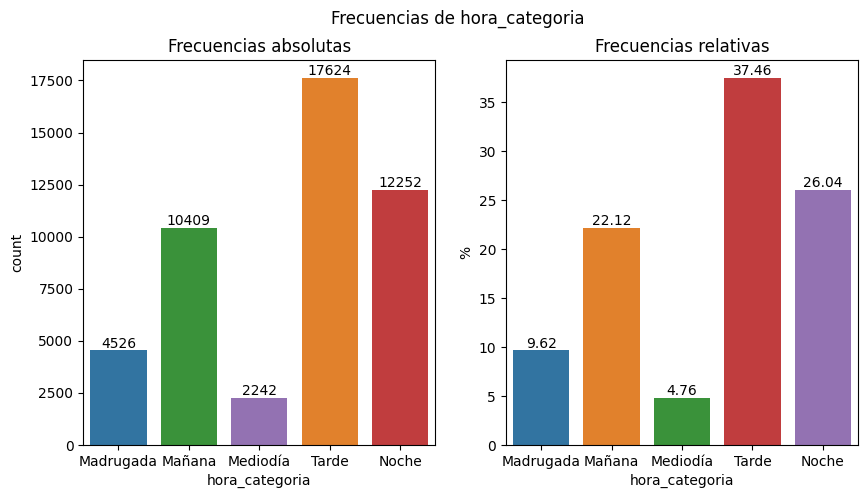

In [32]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
fig.suptitle("Frecuencias de hora_categoria")
franjas = ["Madrugada", "Mañana", "Mediodía", "Tarde", "Noche"]

# Frecuencias absolutas
sns.countplot(x = "hora_categoria", data = df_2022, ax = axs[0], hue = "hora_categoria", order = franjas)
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2022.hora_categoria.value_counts(normalize = True) * 100).round(2).reindex(franjas)
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

In [28]:
df_2022["mes_categoria"] = ""
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

for i, mes in enumerate(meses):
    df_2022.loc[
        (df_2022["fecha_hora"].dt.month == i+1),
        "mes_categoria"
    ] = mes


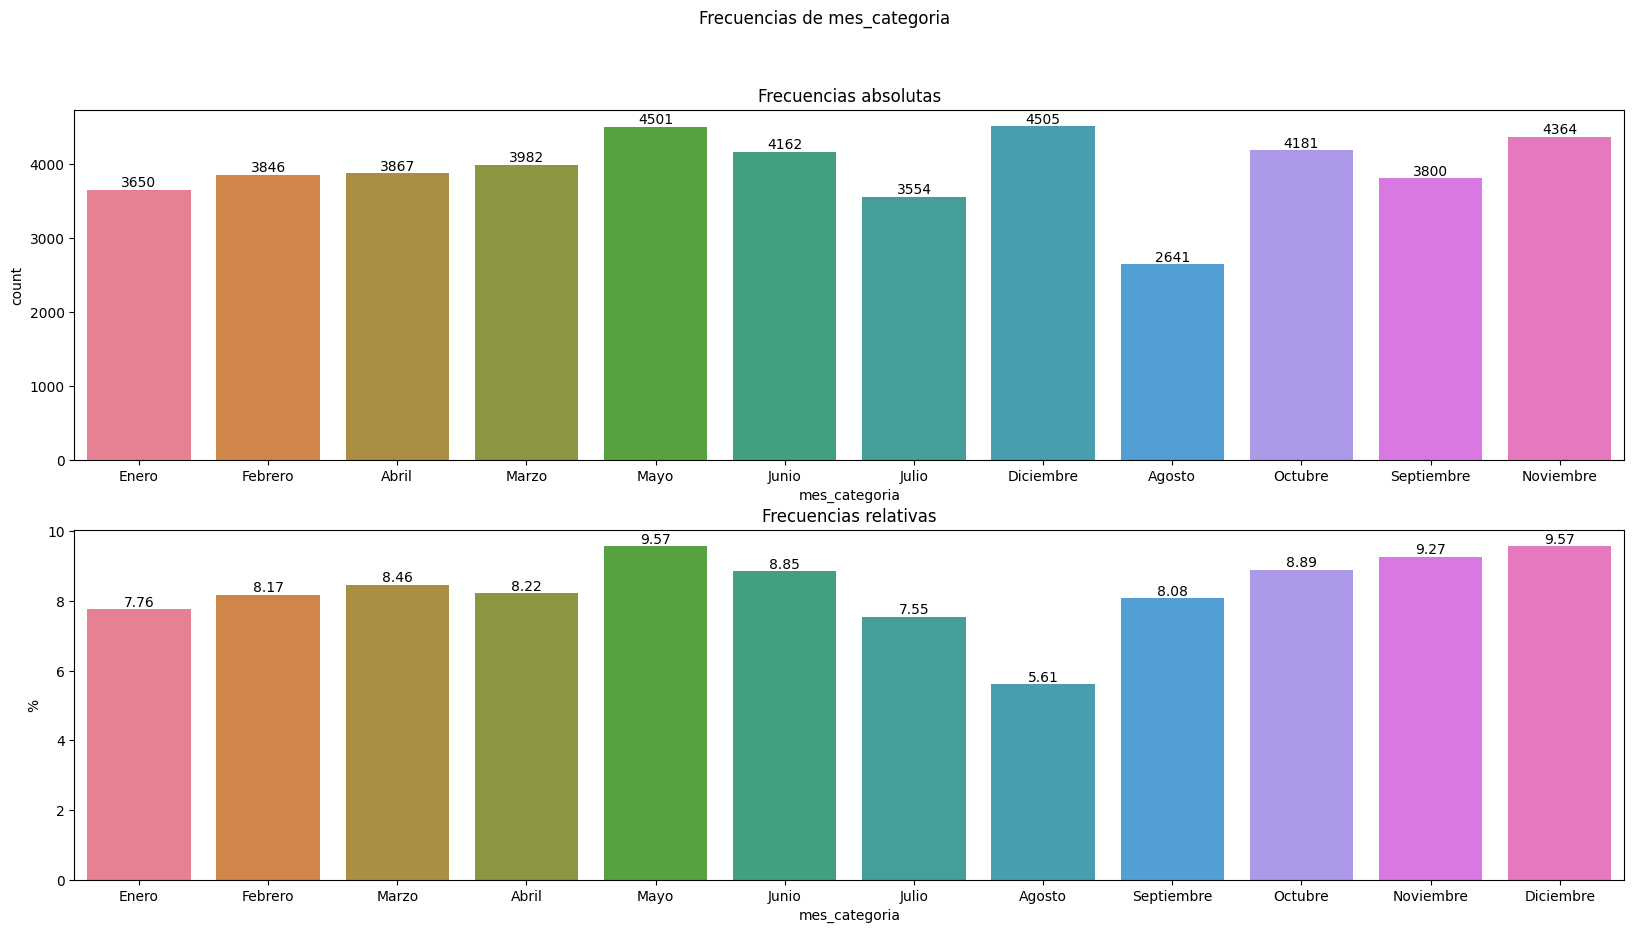

In [29]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10))
fig.suptitle("Frecuencias de mes_categoria")

# Frecuencias absolutas
sns.countplot(x = "mes_categoria", data = df_2022, ax = axs[0], hue = "mes_categoria")
axs[0].set_title("Frecuencias absolutas")
for container in axs[0].containers:
    axs[0].bar_label(container)

# Frecuencias relativas
valores = (df_2022.mes_categoria.value_counts(normalize = True) * 100).round(2).reindex(meses)
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas")
axs[1].set_ylabel("%")
for container in axs[1].containers:
    axs[1].bar_label(container)

plt.show()

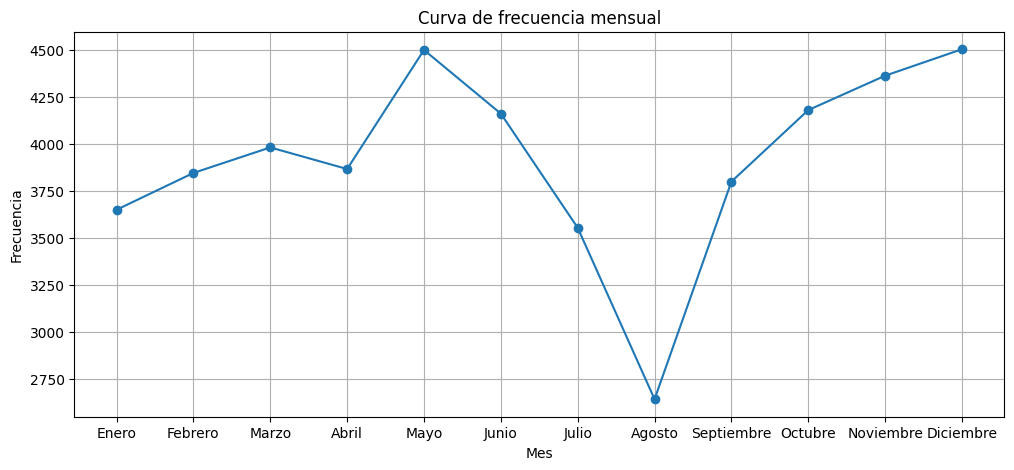

In [30]:
frecuencia_mensual = (df_2022["fecha_hora"].dt.month.value_counts().sort_index())

plt.figure(figsize=(12, 5))
plt.plot(meses, frecuencia_mensual.values, marker="o")

plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.title("Curva de frecuencia mensual")
plt.grid(True)
plt.show()


Tanto en 2022 como en 2023 hay una pico de caída en Agosto (mes de vacaciones en el que mucha gente sale de Madrid). También Diciembre es uno de los meses con mayores accidentes en ambos casos. Voy a ver si los días de fiestas (puente de diciembre, nochebuena y nochevieja) que hay muchos desplazamientos hay más accidentes que el resto de días.

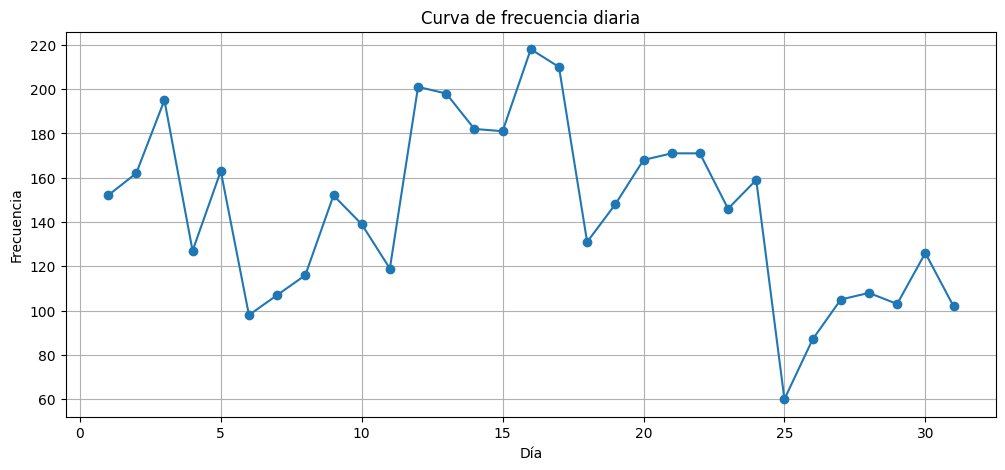

In [31]:
df_dic_22 = df_2022[df_2022["fecha_hora"].dt.month == 12]


frecuencia_diaria = (df_dic_22["fecha_hora"].dt.day.value_counts().sort_index())

plt.figure(figsize=(12, 5))
plt.plot(frecuencia_diaria.index, frecuencia_diaria.values, marker="o")

plt.xlabel("Día")
plt.ylabel("Frecuencia")
plt.title("Curva de frecuencia diaria")
plt.grid(True)
plt.show()


## Análisis bivariante

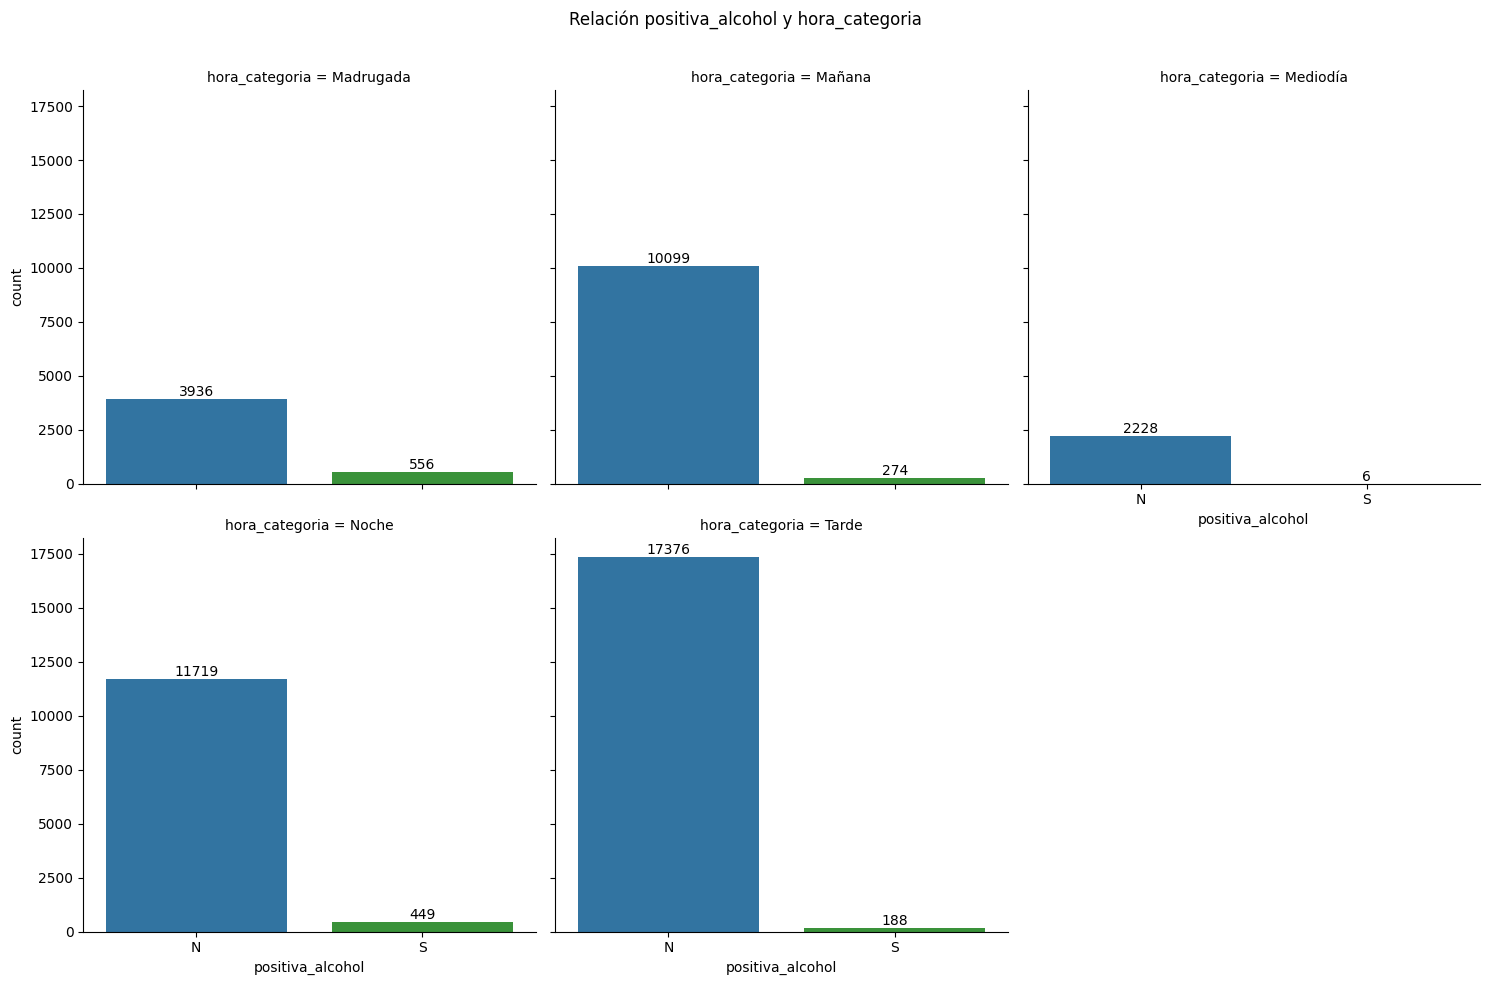

In [33]:
alcohol = df_2022[df_2022["positiva_alcohol"] != "No consta"]["positiva_alcohol"].unique()
df_alcohol = df_2022[df_2022["positiva_alcohol"].isin(alcohol)]

fig = sns.catplot(data = df_alcohol.sort_values("hora_categoria"),
            x = "positiva_alcohol",
            col = "hora_categoria",
            kind = "count",
            orient = "v",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

In [34]:
cat_colx = "positiva_alcohol"
cat_coly = "hora_categoria"
frecuencias_relativas = df_2022.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

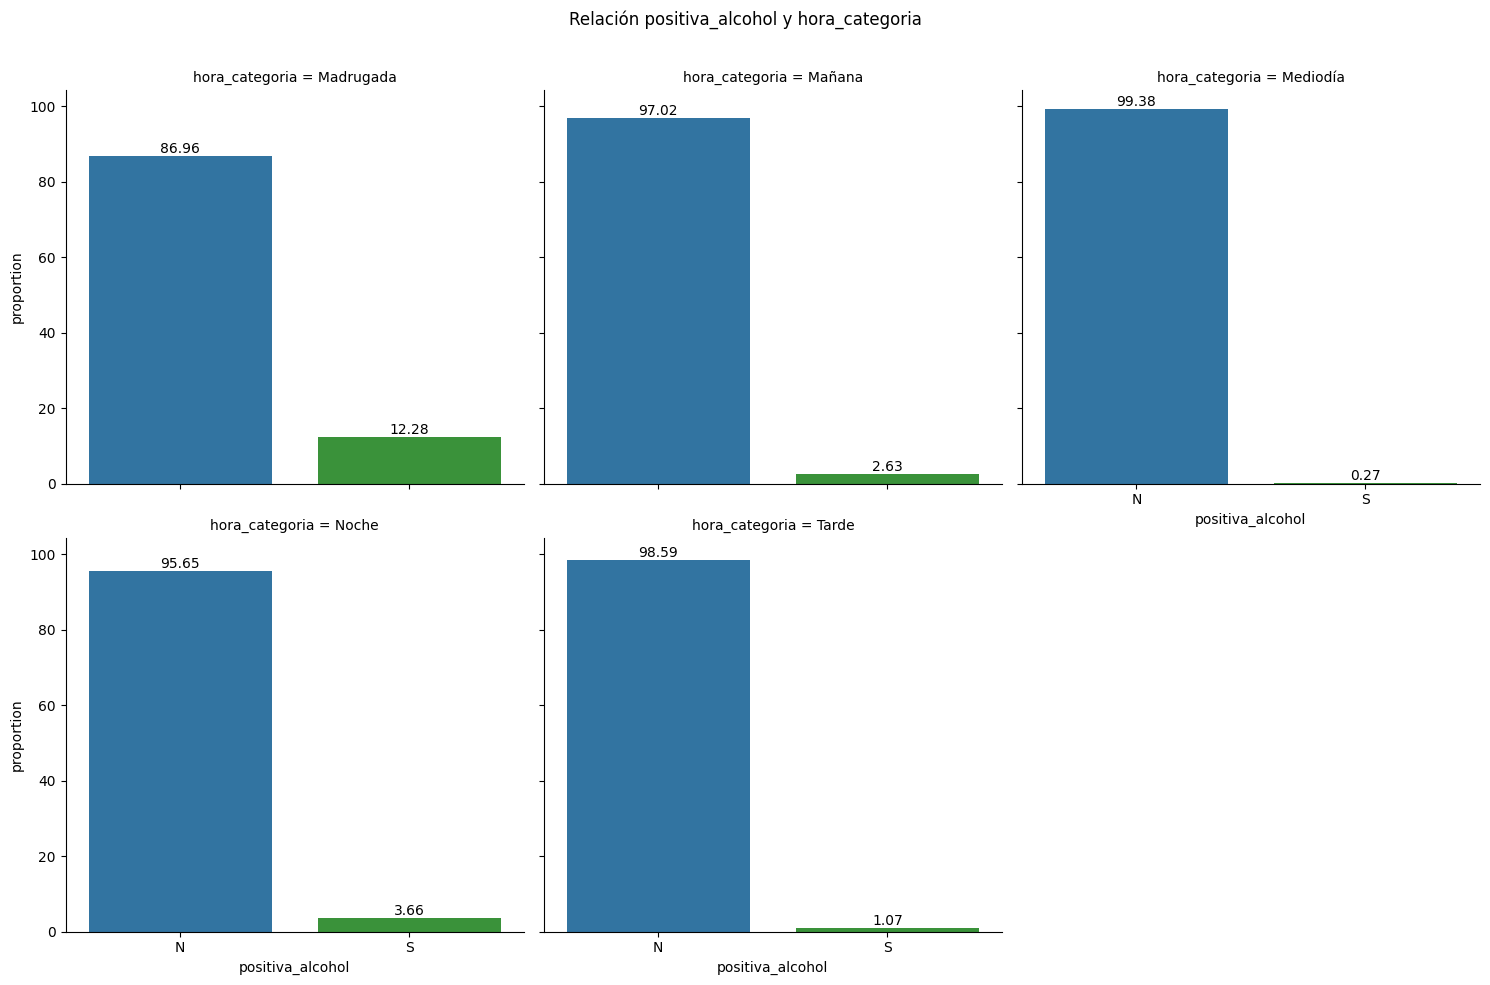

In [35]:
fig = sns.catplot(data = frecuencias_relativas,
            x = "positiva_alcohol",
            y = "proportion",
            col = "hora_categoria",
            kind = "bar",
            hue = "positiva_alcohol",
            col_wrap = 3,
            order = alcohol)

plt.suptitle("Relación positiva_alcohol y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

De nuevo, donde más positivos de alcohol hay es de noche y sobre todo de madrugada.

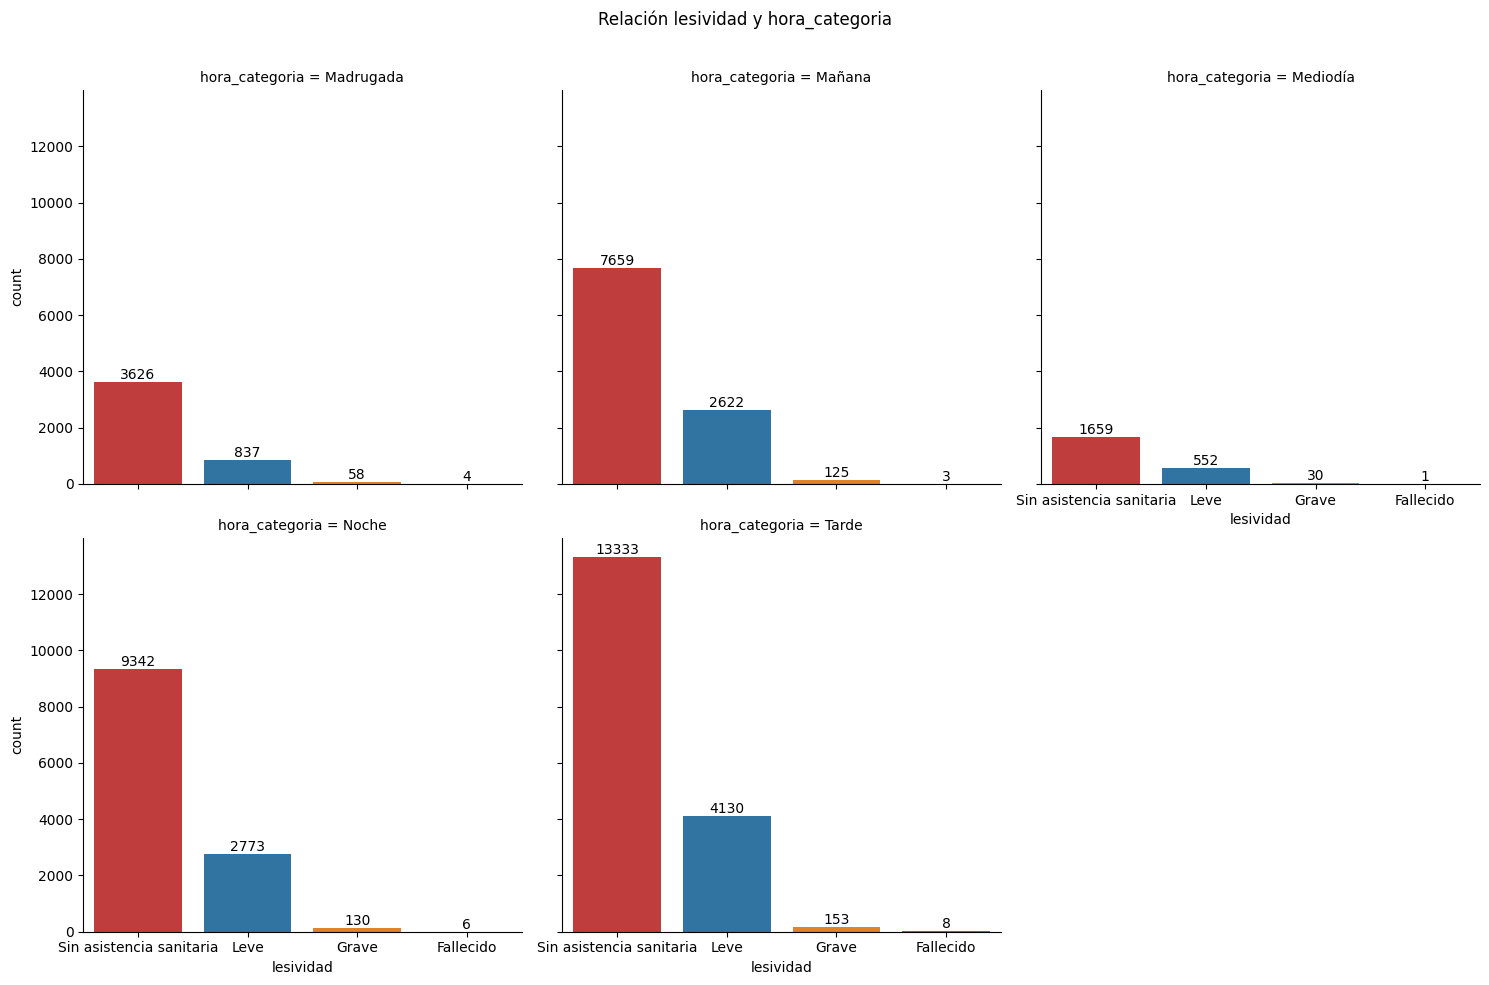

In [36]:
lesividades = df_2022[df_2022["lesividad"] != "Se desconoce"]["lesividad"].unique()
df_lesividades = df_2022[df_2022["lesividad"].isin(lesividades)]

fig = sns.catplot(data = df_lesividades.sort_values("hora_categoria"),
            x = "lesividad",
            col = "hora_categoria",
            kind = "count",
            orient = "v",
            hue = "lesividad",
            col_wrap = 3,
            order = lesividades)

plt.suptitle("Relación lesividad y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

In [37]:
cat_colx = "lesividad"
cat_coly = "hora_categoria"
frecuencias_relativas = df_2022.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] = (frecuencias_relativas["proportion"] * 100).round(2)

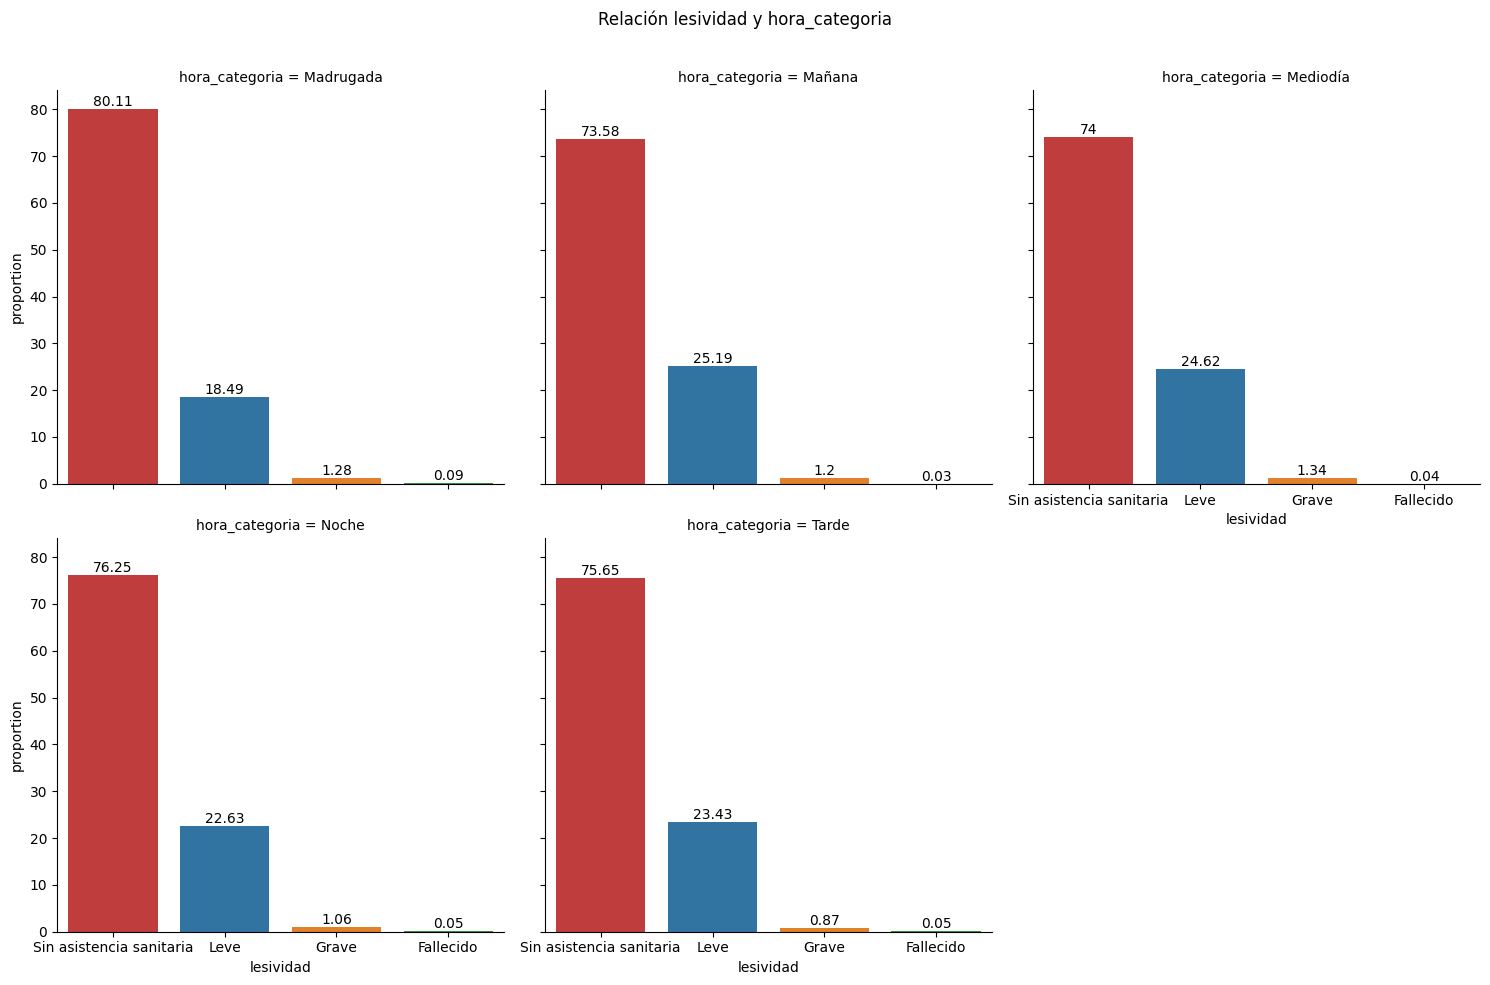

In [38]:
fig = sns.catplot(data = frecuencias_relativas,
            x = "lesividad",
            y = "proportion",
            col = "hora_categoria",
            kind = "bar",
            hue = "lesividad",
            col_wrap = 3,
            order = lesividades)

plt.suptitle("Relación lesividad y hora_categoria")
fig.fig.subplots_adjust(top = 0.9)

for ax in fig.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container)

plt.show()

Aquí en cambio el mayor porcentaje de graves es de mediodía y de fallecidos de madrugada.